## environment setup

In [1]:
from pathlib import Path
import joblib
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import sys
from typing import Union
sys.path.append('..')
from utils.planar_utils import load_planar_dataset

## load the dataset

In [2]:
## CATVSNONCAT DATASET ##
###########################
def load_data():
    """
    Load the train and test set.

    Returns:
        - (X_train, Y_train, X_test, Y_test)
    """

    path = Path('../../data/catvnoncat/data.pkl')
    with open(path, "rb") as f:
        data = joblib.load(f)

    X_train = data["train_set_x"]
    Y_train = data["train_set_y"]
    X_test = data["test_set_x"]
    Y_test = data["test_set_y"]

    return X_train, Y_train, X_test, Y_test
############################
############################

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_data()

print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"Y_train_orig shape: {Y_train_orig.shape}")
print(f"X_test_orig shape: {X_test_orig.shape}")
print(f"Y_test_orig shape: {Y_test_orig.shape}")

X_train_orig shape: (209, 64, 64, 3)
Y_train_orig shape: (209,)
X_test_orig shape: (50, 64, 64, 3)
Y_test_orig shape: (50,)


## visualize the data

In [4]:
## CATVSNONCAT DATASET ##
#########################
def visualize_data(X, Y):
    """
    Displays a random image from the CATVNONCAT dataset with its label
    """
    m = X.shape[0]
    i = random.randint(0, m-1)
    x = X[i]
    y = Y[i]
    labels = {0: "non-cat", 1: "cat"}
    print(f'label: {labels[y]}')
    plt.imshow(x)
####################
####################

label: cat


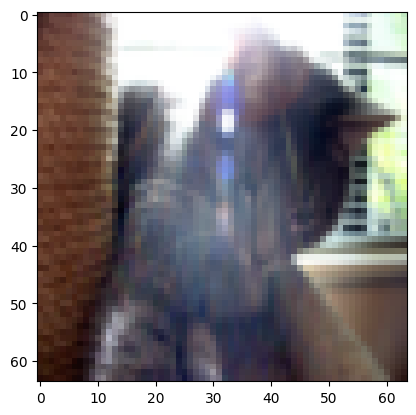

In [5]:
visualize_data(X_train_orig, Y_train_orig)

## preprocess the data

In [6]:
## CATVSNONCAT DATASET ##
#########################
def preprocess_data(X, Y = None):
    """Preprocess input data, in order to be fed as the input of the neural network.
    
    Operations:
        - Reshaping of the arrays to fit the Neural Network Input
        - Normalization
    Returns:
        (X_pp, Y_pp)
        
        using the following notations:
        - n_x: number of features in the input of the neural network
        - m: number of observations 
        X_pp: normalized matrix of size (n_x, m)
        Y_pp: normalized array of size (1, m)
    """
    m = X.shape[0]

    ## Reshape the arrays
    ### START CODE ###
    X = X.reshape(m, -1).T
    if Y is not None:
        Y = Y.reshape(m, 1).T
    ### END CODE ###

    ## normalization
    ### START CODE ###
    X = X / 255.
    ### END CODE ###
    return X,Y

####################
####################

In [7]:
X_train, Y_train = preprocess_data(X_train_orig, Y_train_orig)
X_test, Y_test = preprocess_data(X_test_orig, Y_test_orig)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (12288, 209)
Y_train shape: (1, 209)
X_test shape: (12288, 50)
Y_test shape: (1, 50)


## implement the logistic regression class

In [31]:
class LogisticRegression:

    def __init__(self, n_0: int):
        """
        Args:
            - n_0: size of the input layer
        """
        self.n_0 = n_0
        self.n_1 = 1
        self.params = None

    def initialize_params(self):
        W = np.zeros((self.n_1, self.n_0))
        b = np.zeros(self.n_1)
        params = {
            "W": W,
            "b": b
        }
        self.params = params

    def forward_propagate(self, X):
        """Perform the forward propagation operation.
        
        Args:
            - X: a dataset of observation (shape: n_0, m)

        Returns:
            - A: the matrix of activations of the output layer
        """
        ### START CODE ###
        W = self.params["W"]
        b = self.params["b"]
        A = self.sigmoid(np.dot(W, X) + b)
        ### END CODE ###
        return A
    
    def compute_cost(self, A, Y):
        """Compute the cost of the output layer activation.
        
        Args:
            - A: the matrix of activations of the output layer. Shape: (n_1,m)
            - Y: ground truths. Shape: (n_1,m)
        """
        ### START CODE ###
        m = A.shape[1]
        cost = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
        ### END CODE ###
        
        return cost

    def backward_propagate(self, X, Y, A):
        """The Backward propagation operation.
        
        Args:
            - X: the matrix of observations. Shape: (n_0, m)
            - Y: ground truths. Shape: (n_1, m)
            - A: the activations of the output layer. Shape: (n_1, m)
        
        Returns:
            - grads: a dictionary containing the gradients for all model parameters. {"dW": dW, "db": db}
        """
        m = X.shape[1]
        grads = dict()
        grads["dW"] = (1/m) * np.dot((A-Y), X.T)
        grads["db"] = (1/m) * np.sum(A-Y)
        ### END CODE ###
        
        return grads

    def update_params(self, grads, learning_rate):
        """Update weights using gradient descent.
        
        Args:
            - params: a dictionary of the model parameters: {"W": W, "b": b}
            - grads: a dictionary containing the gradients for all model parameters. {"dW": dW, "db": db}
            - learning_rate: the learning rate (float number)
        Returns:
            - params: a dictionary of the model parameters updated: {"W": W, "b": b}
        """
        W = self.params["W"]
        b = self.params["b"]
        dW = grads["dW"]
        db = grads["db"]

        W = W - learning_rate*dW
        b = b - learning_rate*db

        self.params["W"] = W
        self.params["b"] = b


    def train(self, X_train, Y_train, nb_iterations: int, learning_rate: float):
        """Combines all the operations necessary to train the logistic regression.
    
        Args:
            - X_train: the matrix of observations. Shape: (n_0, m)
            - Y_train: ground truths. Shape: (n_1, m)
            - nb_iterations: number of iterations to perform gradient descent
            - learning_rate: the learning rate (float number)

        Returns:
            - (params, cost) with:
                - params: dictionary of the model parameters: {"W": W, "b": b}
                - costs: list of the costs for each 100th iteration (iteration 1, iteration 100, etc.)
        """

        self.initialize_params()

        costs = list()

        for i in range(nb_iterations):
            A = self.forward_propagate(X_train)
            cost = self.compute_cost(A, Y_train)
            grads = self.backward_propagate(X_train, Y_train, A)
            self.update_params(grads, learning_rate)

            if (i % 100) == 0:# we store the cost each 100 iterations
                costs.append(cost)
        
        return costs

    def predict_proba(self, X, threshold = 0.5):
        """Predicts the output of the logistic regression.

        Args:
            - params: dictionary of the model parameters: {"W": W, "b": b}
            - X: a matrix of observations. Shape: (n_0, ?)
            - threshold: threshold to use for the prediction (default 0.5 means: if p >= 0.5, we predict 1, else 0)
        
        Returns:
            - Yp: vector of predictions.
        """
        A = self.forward_propagate(X)
        return A

    def predict(self, X, threshold = 0.5):
        """Predicts the output of the logistic regression.

        Args:
            - params: dictionary of the model parameters: {"W": W, "b": b}
            - X: a matrix of observations. Shape: (n_0, ?)
            - threshold: threshold to use for the prediction (default 0.5 means: if p >= 0.5, we predict 1, else 0)
        
        Returns:
            - Yp: vector of predictions.
        """
        A = self.predict_proba(X)
        Yp = 1*(A >= threshold)
        return Yp


    def evaluate_performance(self, X_train, Y_train, X_test, Y_test, print_perf=True):
        """Evaluates the performance of the logistic regression.
        
        Args:
            - X_train: matrix of observations for the training set
            - Y_train: ground truths for the training set
            - X_test: matrix of observations for the test set
            - Y_test: ground truths for the test set
            - params: the logistic regression parameters
            - print_perf: boolean. If true, prints the performance on the train and test set, as well as the baseline performance.

        Returns:
            - (acc_train, acc_test) where:
                - acc_train: accuracy on the train set
                - acc_test: accuracy on the test set
        """
        Yp_train = self.predict(X_train)
        Yp_test = self.predict(X_test)
        
        acc_train = np.mean(Yp_train == Y_train)
        acc_test = np.mean(Yp_test == Y_test)

        if print_perf:
            print(f'train accuracy: {acc_train:.1%}')
            print(f'test accuracy: {acc_test:.1%}')
            print("")
            
            acc_bs_one = (Y_test == 1).mean()
            acc_bs_zero = (Y_test == 0).mean()
            print('baseline:')
            print(f'test accuracy, model always predicts "1": {acc_bs_one:.1%}')
            print(f'test accuracy, model always predicts "0": {acc_bs_zero:.1%}')

        return acc_train, acc_test

    @staticmethod
    def sigmoid(z: Union[np.array, float]) -> Union[np.array, float]:
        """The sigmoid function.
        Args:
            - z: a numpy array or float
        Returns:
            - sigmoid(z)
        """
        return 1 / (1 + np.exp(-z))

## test the class

In [32]:
n_0 = X_train.shape[0]
model = LogisticRegression(n_0)

In [33]:
nb_it = 2000
lr = 0.01
costs = model.train(X_train, Y_train, nb_it, lr)

In [35]:
model.evaluate_performance(X_train, Y_train, X_test, Y_test)

train accuracy: 99.5%
test accuracy: 70.0%

baseline:
test accuracy, model always predicts "1": 66.0%
test accuracy, model always predicts "0": 34.0%


(0.9952153110047847, 0.7)

In [30]:
model.predict_proba(X_test)

array([[0.97744653, 0.93191718, 0.9259746 , 0.97370439, 0.80630695,
        0.5842876 , 0.00739817, 0.90060993, 0.91766994, 0.71941189,
        0.16021283, 0.45060685, 0.78174999, 0.88033773, 0.00234832,
        0.9682785 , 0.01033801, 0.92554244, 0.11868406, 0.00968385,
        0.97773033, 0.10981217, 0.00373846, 0.8853758 , 0.51210909,
        0.6657113 , 0.87004828, 0.0027462 , 0.00879733, 0.99961704,
        0.08731211, 0.83141901, 0.6773892 , 0.51174238, 0.64806343,
        0.01212625, 0.03214257, 0.80744254, 0.24846504, 0.03127483,
        0.7687425 , 0.28389325, 0.72013956, 0.0077735 , 0.97653729,
        0.70540637, 0.15182597, 0.99410592, 0.75526241, 0.06406822]])

In [29]:
model.predict(X_test)

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0]])